In [12]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Reading the dataset
data=pd.read_csv('/content/sample_data/diabetes.csv')

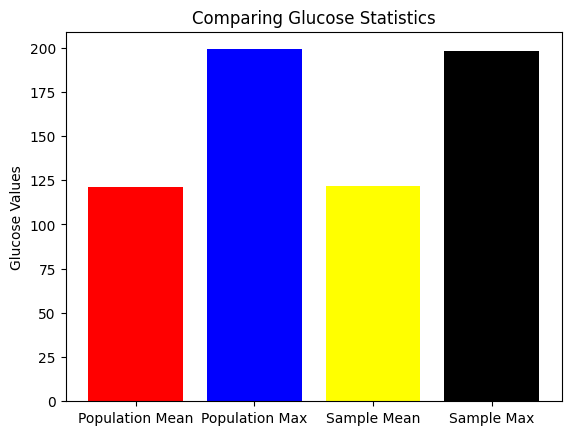

In [14]:
#A)

np.random.seed(789)
sample = data.sample(25)
population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

#Plotting bar chart for comparison
name_label = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
values = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]
plt.bar(name_label, values, color=['red', 'blue', 'yellow', 'black'])
plt.title('Comparing Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

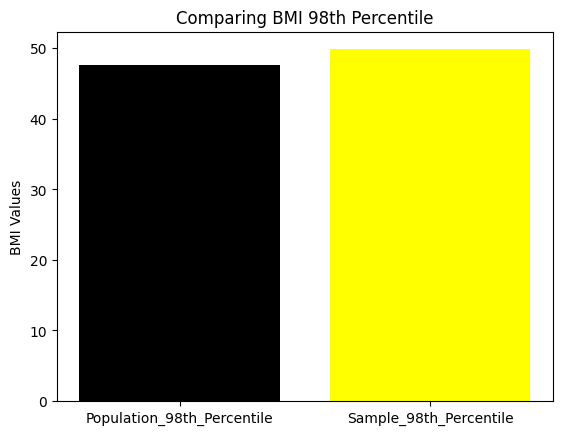

In [15]:
#B)

population_percentage = np.percentile(data['BMI'], 98)
sample_percentage = np.percentile(sample['BMI'], 98)
label = ['Population_98th_Percentile', 'Sample_98th_Percentile']
value = [population_percentage, sample_percentage]
plt.bar(label, value, color=['black', 'yellow'])
plt.title('Comparing BMI 98th Percentile')
plt.ylabel('BMI Values')
plt.show()

In [16]:
#C)

bootstrap_sample = 500
sample_size = 150

bootstrap_mean = np.zeros(bootstrap_sample)
bootstrap_std_deviation = np.zeros(bootstrap_sample)
bootstrap_percentile = np.zeros(bootstrap_sample)

for i in range(bootstrap_sample):
    bootstrap = data['BloodPressure'].sample(sample_size, replace=True)
    bootstrap_mean[i] = bootstrap.mean()
    bootstrap_std_deviation[i] = bootstrap.std()
    bootstrap_percentile[i] = np.percentile(bootstrap, 98)

population_mean = data['BloodPressure'].mean()
population_std_deviation = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], 98)

mean=np.mean(bootstrap_mean)
sd=np.mean(bootstrap_std_deviation)
percentile=np.mean(bootstrap_percentile)


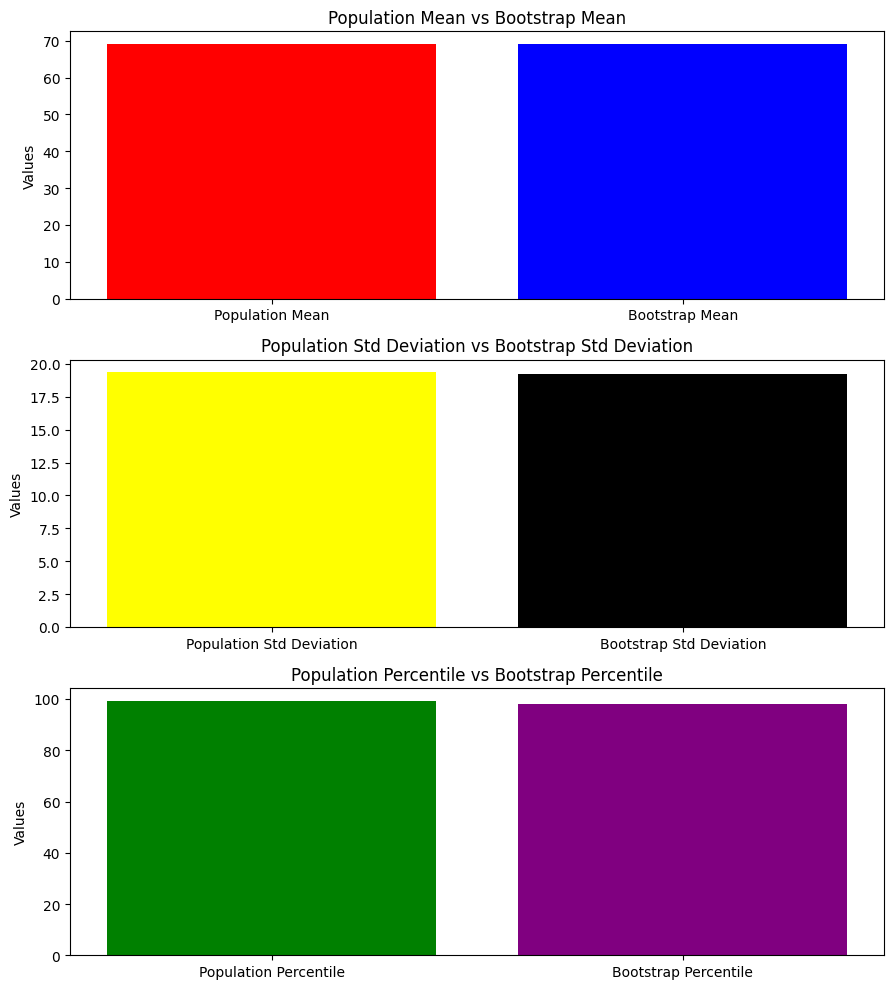

In [17]:
#plotting the graphs
fig, axs = plt.subplots(3, 1, figsize=(9, 10))

axs[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean, mean], color=['red', 'blue'])
axs[0].set_ylabel('Values')
axs[0].set_title('Population Mean vs Bootstrap Mean')

axs[1].bar(['Population Std Deviation', 'Bootstrap Std Deviation'], [population_std_deviation, sd], color=['yellow', 'black'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Std Deviation vs Bootstrap Std Deviation')

axs[2].bar(['Population Percentile', 'Bootstrap Percentile'], [population_percentile, percentile], color=['green', 'purple'])
axs[2].set_ylabel('Values')
axs[2].set_title('Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()